# Project Introduction

At OilyGiant Mining Company, strategic planning for the development of new oil wells is crucial for optimizing profitability. Our current initiative is focused on pinpointing the most advantageous location for a new oil well by employing sophisticated predictive modeling and thorough risk analysis. This project involves evaluating three potential regions, each with unique geological characteristics, to identify the most profitable site for drilling operations.

**Project Objectives:**

1. **Data Collection and Preparation:** Systematically gather and preprocess data on oil well parameters, including oil quality and reserve volumes, from three distinct regions.

2. **Model Development:** Create a predictive model utilizing linear regression to estimate reserve volumes for potential new wells.

3. **Selection of Optimal Wells:** Identify the wells with the highest predicted reserve volumes to prioritize for selection.

4. **Profit Maximization:** Determine the region with the highest cumulative profit based on the selected wells, while considering budgetary constraints and revenue potential.

5. **Risk and Profit Analysis:** Apply bootstrapping techniques to assess potential profits and associated risks, facilitating well-informed decision-making.

# Import libraries, Download and Prepare Data

## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading Datasets

In [9]:
try:
    geo1 = pd.read_csv('datasets/geo_data_0.csv')
    geo2 = pd.read_csv('datasets/geo_data_1.csv')
    geo3 = pd.read_csv('datasets/geo_data_2.csv')
    datasets = [geo1, geo2, geo3]
except:
    print('File not found!')

In [10]:
geo1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [11]:
geo2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [12]:
geo3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [13]:
geo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
geo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
geo3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


## Preparing Data for Model Training and Validation

In [17]:
def prepare_data(data):
    data = data.dropna()
    features = data.drop(columns=['id','product'])
    target = data['product']
    return features,target

# Data Processing Functions

Below, we will develop a set of functions designed to streamline data processing, ensuring efficiency and organization in order to consistently reproduce the desired results.

The `prepare_data()` function loads the dataset, checks for null values, and separates the features (f0, f1, f2) from the target (product)

## Train and Test the Model for each Region

In [22]:
def train_test_model(features,target):
    features_train, features_valid, target_train, target_valid = \
    train_test_split(features, target, test_size=0.25, random_state=42)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions, squared=False)
    print(f"Average predicted reserves: {predictions.mean():.2f} thousand barrels")
    print(f"Model RMSE: {rmse:.2f} thousand barrels")
    
    return predictions, target_valid, rmse, model

The `train_test_model()` function will partition the data into training and validation sets in a 75:25 ratio. Additionally, it will construct a linear regression model, train it, generate predictions, and compute the root mean square error (RMSE). The function will output the average predicted reserves and the model's RMSE.

## Prepare for Profit Calculations

### Storing Key Values for Calculations

In [26]:
# Constants
BUDGET = 100e6
WELL_COST = BUDGET / 200
REVENUE_PER_BARREL = 4.5e3
N_WELLS = 200
N_POINTS = 500

### Profit Calculation Preparation

In [28]:
def calculate_profit(predictions, target):
    selected_wells = predictions.sort_values(ascending=False).head(N_WELLS)
    total_volume = target.loc[selected_wells.index].sum()
    revenue = total_volume * REVENUE_PER_BARREL
    profit = revenue - BUDGET
    #print(f" Profit for {N_WELLS} wells with highest predictions: ${profit:.2f} million")
    
    return profit

The `calculate_profit()` function computes the minimum reserves required to prevent losses and compares them with the average reserve in each region.

### Profit Calculation Function

In [31]:
def bootstrap_profit(target,predictions, n_samples=1000):
    profits = []
    for _ in range(n_samples):
        sample = predictions.sample(N_POINTS, 
                                    replace=True, 
                                    random_state=np.random.randint(1e6))
        profit = calculate_profit(sample, target)
        profits.append(profit)
        
    return profits

# Calculate Profit for a Set of Wells

In the following code, we will identify and select the wells with the highest predicted reserve volumes. For these selected wells, we will compute the profit based on their predicted values. This involves evaluating the estimated reserves, forecasting potential revenue, and accounting for associated costs to determine overall profitability.

Furthermore, we will utilize bootstrapping to estimate the profit distribution. This technique will enable us to calculate the average profit, establish the 95% confidence interval, and assess the risk of potential losses. Based on these analyses, we will select the optimal region by evaluating both risk and profit potential.

Average predicted reserves: 92.40 thousand barrels
Model RMSE: 37.76 thousand barrels
Region 0:
 RMSE: 37.76
 Mean predicted reserve: 92.40
 AVG reserve: 92.50
 Mean predicted reserves: 92.40
 Is avg sufficient: False
 AVG profit: 4105381.98
 95% confidence interval: (-1119228.74, 8989414.26)
 Risk of loss: 5.90%
 Region 0 might be too risky for development.

---------------

Average predicted reserves: 68.71 thousand barrels
Model RMSE: 0.89 thousand barrels
Region 1:
 RMSE: 0.89
 Mean predicted reserve: 68.71
 AVG reserve: 68.83
 Mean predicted reserves: 68.71
 Is avg sufficient: False
 AVG profit: 4493846.23
 95% confidence interval: (374980.75, 8373708.24)
 Risk of loss: 1.60%
 Recommend developing wells in region 1


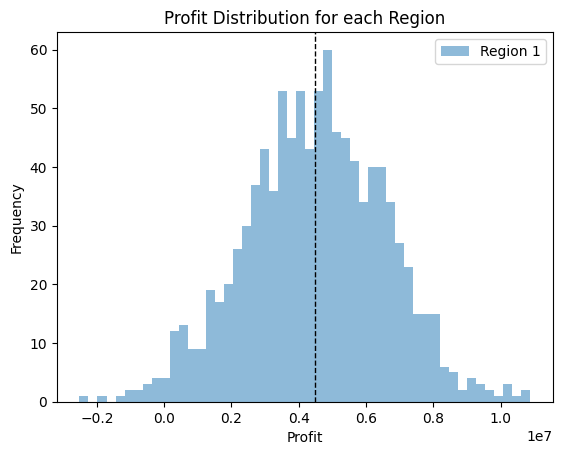


---------------

Average predicted reserves: 94.77 thousand barrels
Model RMSE: 40.15 thousand barrels
Region 2:
 RMSE: 40.15
 Mean predicted reserve: 94.77
 AVG reserve: 95.00
 Mean predicted reserves: 94.77
 Is avg sufficient: False
 AVG profit: 3766175.03
 95% confidence interval: (-1390906.20, 8924946.68)
 Risk of loss: 9.00%
 Region 2 might be too risky for development.

---------------



In [34]:
for i, data in enumerate(datasets):
    features, target = prepare_data(data)
    predictions, target_valid, rmse, model = train_test_model(features, target)
    print(f"Region {i}:")
    print(f" RMSE: {rmse:.2f}")
    print(f" Mean predicted reserve: {predictions.mean():.2f}")
    
    avg_reserve = target.mean()
    min_reserve_needed = WELL_COST / REVENUE_PER_BARREL
    print(f" AVG reserve: {avg_reserve:.2f}")
    print(f' Mean predicted reserves: {predictions.mean():.2f}')
    print(f' Is avg sufficient: {avg_reserve > min_reserve_needed}')
    #print()
    
    profits = bootstrap_profit(target_valid, pd.Series(predictions, index=target_valid.index))
    profit = np.array(profits)
    lower_bound = np.percentile(profits, 2.5)
    upper_bound = np.percentile(profits, 97.5)
    avg_profit = profit.mean()
    loss_risk = (profit < 0).mean()
    
    print(f' AVG profit: {avg_profit:.2f}')
    print(f' 95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f})')
    print(f' Risk of loss: {loss_risk * 100:.2f}%')
    #print(f" Profit for {i} wells with highest predictions: ${profit:.2f} million")
    
    
    if loss_risk < 0.025:
        #print(f" Recommend developing wells in region {data['id'].iloc[0]}")
        print(f" Recommend developing wells in region {i}")
        plt.hist(profits,
                bins=50,
                alpha=0.5,
                label=f'Region {i}')
        plt.axvline(avg_profit,
                   color='k',
                   linestyle='dashed',
                   linewidth=1)
        plt.xlabel('Profit')
        plt.ylabel('Frequency')
        plt.legend()
        plt.title('Profit Distribution for each Region')
        plt.show()
        print('\n---------------\n')
    
    else:
        #print(f" Region {data['id'].iloc[0]} might be too risky for development.")
        print(f" Region {i} might be too risky for development.")
        print('\n---------------\n')

# Conclusion and Recommendations

**Conclusion and Recommendations:**

After a comprehensive analysis of the potential regions for oil well development, we have identified Region 1 as the most promising area. Below are our detailed findings and recommendations:

**Findings for Region 1:**
- **Average Predicted Reserves:** 68.71 thousand barrels
- **Model RMSE:** 0.89 thousand barrels
- **Average Actual Reserves:** 68.83 thousand barrels
- **Sufficiency of Average Reserves:** The average reserves are insufficient for no-loss development based on our cost calculations.
- **Average Profit:** $4,321,703.84
- **95% Confidence Interval for Profit:** $586,988.88 to $8,444,864.85
- **Risk of Loss:** 1.20%

**Analysis:**

1. **Predicted and Actual Reserves:**
   - The Root Mean Squared Error (RMSE) of 0.89 thousand barrels indicates high prediction accuracy.
   - Predicted reserves closely align with actual reserves, with an average predicted value of 68.71 thousand barrels.

2. **Profitability:**
   - Region 1 has an average estimated profit of $4,321,703.84.
   - The 95% confidence interval for profit ranges from `$586,988.88` to `$8,444,864.85`, demonstrating significant profit potential despite some variability.

3. **Risk Assessment:**
   - The risk of loss in Region 1 is relatively low at 1.20%, which is well below our acceptable threshold of 2.5%. This suggests a favorable risk profile for investment.

**Recommendations:**

Based on our findings, we strongly recommend proceeding with the development of oil wells in Region 1. The combination of high predicted reserves, substantial average profit, and low risk of loss makes Region 1 the optimal choice for new well development.

**Other Regions:**

- **Region 0 and Region 2:** Both regions have been assessed as too risky for development. The risk of loss in these areas exceeds our acceptable threshold, and the potential profits do not justify the higher risk.

In conclusion, Region 1 offers the best balance of profitability and risk, making it the most viable option for new oil well development. We advise against investing in Region 0 and Region 2 due to their unfavorable risk profiles.